In [1]:
# Script générant une figure montrant des exemples de segmentation d'un nuage de points 2D avec un 
# classificateur AdaBoost en variant le nombre de classificateurs linéaires. 
#
# Le but est de produire une figure associée à celle de bishop-fig14_2a mentionnée dans la présentation 
# Apprentissage supervisé pour la classification de Christian Gagné pour l'École en ligne en apprentissage automatique.

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

In [2]:
# Partie I: Génération des données à classifier

In [3]:
# Les données 2D sont constituées de deux croissants avec bruit. 

X, y = make_moons(n_samples=500,noise=0.15, random_state=0)

# Prétraitement les données
X = StandardScaler().fit_transform(X)
    
# Les données sont séparées selon 50% en entrainement et 50% en test.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,train_size=0.5)

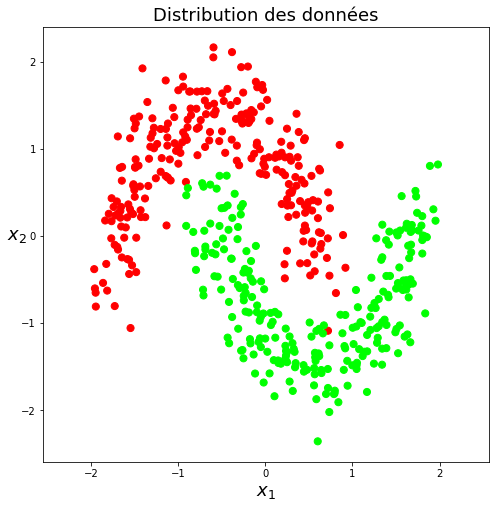

In [4]:
# Affichage de la distribution de L'ensemble des données.

# Colormap à deux couleurs
vals = np.array([[1,0,0,1],[0,1,0,1]])
newcmap = ListedColormap(vals)

fig = plt.figure(figsize = (8,8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=newcmap)
ax = plt.gca()
ax.axis('equal')
ax.set_xlabel('$x_{1}$',fontsize=18)
ax.set_ylabel('$x_{2}$',rotation=0,fontsize=18)
ax.set_title('Distribution des données',fontsize=18)

plt.show()

In [5]:
# Partie II: Classification des données en utilisant la méthode AdaBoost 

In [6]:
# Dans ce qui suit, on effectue la classification en utilisant un nombre variable d'estimateurs linéaires afin de voir
# l'effet de ce paramètre sur la qualité des résultats.

# Valeurs du nombre d'estimateurs linéaires à utiliser
L = np.array([1, 3, 5, 10, 15, 20])

In [7]:
# Fonction d'affichage de la frontière de classification
def plot_decision_function(model, ax=None, plot_support=True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # Génère grille ou la fonction P(X) associé à ce classificateur est échantillonnée
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # Affiche les contours de h(X) définissant la frontière
    ax.contour(X, Y, P, colors='k',
               levels=[0.], alpha=0.5,
               linestyles=['--'],linewidths=3)

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

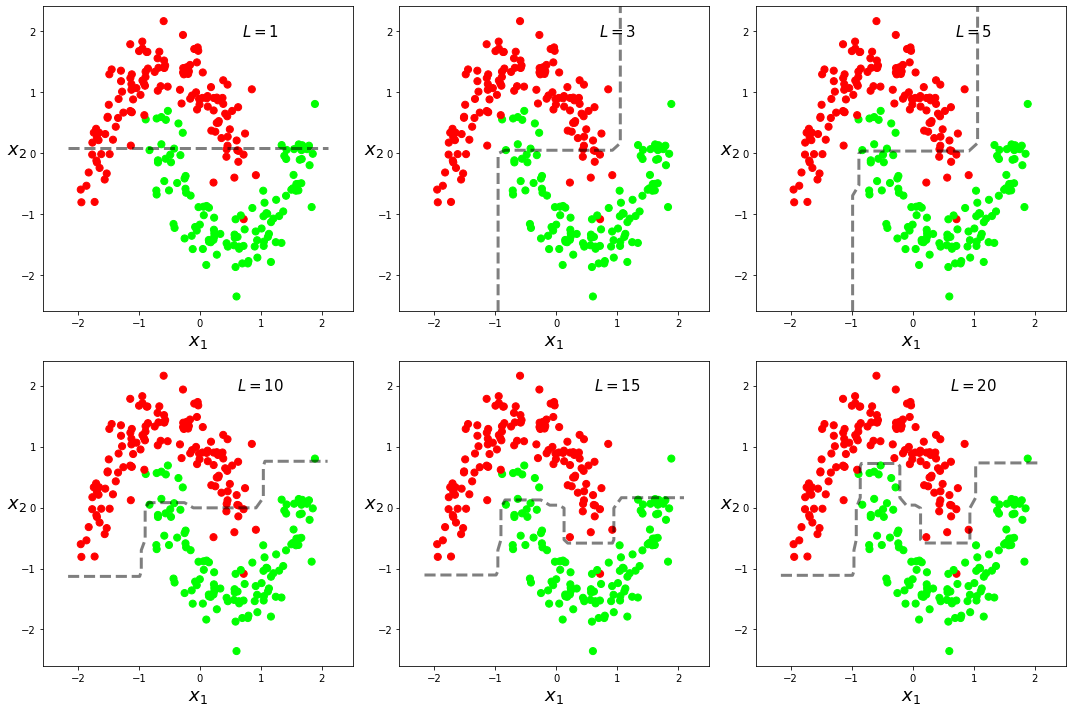

In [8]:
# Affichage des résultats de classification en utilisant les nombres d'estimateurs linéaires précédents
# Seules les données de l'ensemble d'entrainement sont affichées.

# Colormap à deux couleurs
vals = np.array([[1,0,0,1],[0,1,0,1]])
newcmap = ListedColormap(vals)

# Affiche données à classifier
fig = plt.figure(figsize = (15,10))

score = []

for k, n in enumerate(L):
    # Entraine le modèle d'abre décisionel AdaBoost avec l'ensemble d'entrainement
    model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME", n_estimators=n)
    clf = model.fit(X_train, y_train)

    # Évalue les performances avec l'ensemble de test
    score.append(clf.score(X_test, y_test))
        
    ax = plt.subplot(2,3,k+1)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap=newcmap)
    plot_decision_function(clf,ax=ax)
    ax.axis('equal')
    ax.set_xlabel('$x_{1}$',fontsize=18)
    ax.set_ylabel('$x_{2}$',rotation=0,fontsize=18)
    #ax.get_xaxis().set_visible(False)
    #ax.get_yaxis().set_visible(False)

    ax.text(1.,2., '$L=$'+str(n), ha="center", va="center", size=15)

        
plt.tight_layout()
plt.savefig('AdaBoost_bishop-fig14_2a.svg', format='svg')
#plt.savefig('AdaBoost_bishop-fig14_2a.svg', format='png')
plt.show()

In [9]:
# Affiche les performances en classification

for k,n in enumerate(L):
    print('L = %d    score = %.2f' % (n,score[k]))

L = 1    score = 0.84
L = 3    score = 0.90
L = 5    score = 0.90
L = 10    score = 0.90
L = 15    score = 0.92
L = 20    score = 0.98


In [10]:
# Partie III:  Comment varient les performances avec le nombre d'estimateurs?

In [11]:
# On effectue la classification en variant le nombre d'estimateurs linéaires afin de voir
# la relation entre n_estimateurs et le score.

# Valeurs du nombre d'estimateurs linéaires à utiliser
N = 50
L = np.linspace(1,151,N, endpoint=False).astype(int)
score = []

for n in L:
    # Entraine le modèle d'abre décisionel AdaBoost avec l'ensemble d'entrainement
    model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME", n_estimators=n)
    clf = model.fit(X_train, y_train)

    # Évalue les performances avec l'ensemble de test
    score.append(clf.score(X_test, y_test))

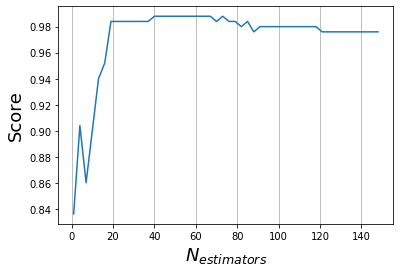

In [12]:
# Affichage des résultats. Les performances chûtent lorsque plus de 60 estimateurs sont utilisés; c'est un exemple de 
# sur-apprentissage.

fig, ax = plt.subplots()
ax.plot(L, score)
ax.xaxis.grid(True, which='major')
ax.set_xlabel('$N_{estimators}$',fontsize=18)
ax.set_ylabel('Score',fontsize=18)
plt.show()